In [ ]:
from utils.data_loader import load_commodity_data
from utils.tickers import *
from strategies.moving_average import MovingAverageCrossover
from backtester.engine_v2 import BacktestEngineV2
from strategies.momentum import MomentumStrategy
from strategies.mean_reversion import MeanReversionStrategy
from strategies.calendar_spread import CalendarSpreadStrategy
from strategies.OU import OrnsteinUhlenbeckStrategy
from strategies.LogMomentum import LogMomentumStrategy

period_start = '2021-01-01'
period_end = '2025-07-05'


# 1. Charger et nettoyer les données
df = load_commodity_data(WTI, period_start, period_end)

# 2. Générer les signaux
OU = OrnsteinUhlenbeckStrategy(z_entry=2.5 ,z_exit=0.8,rolling_window=50)
MA = MovingAverageCrossover(short_window=10, long_window=50)
MR = MeanReversionStrategy(ma_window=30, threshold=8, exit_factor=10)
momentum = MomentumStrategy(lookback=20, threshold=4)
calendar = CalendarSpreadStrategy(lag_days=20, threshold=1, exit=50)
log =LogMomentumStrategy(window=20, threshold=0.03)

signals_ma = MA.generate_signals(df)
signals_mo = momentum.generate_signals(df)
signals_calendar = calendar.generate_signals(df)
signals_logs = log.generate_signals(df)
signals_mr = MR.generate_signals(df)
signals_OU = OU.generate_signals(df)


# 3. Lancer le backtester
engine_ma = BacktestEngineV2(df, signals_ma)
engine_mo = BacktestEngineV2(df, signals_mo)
engine_cs = BacktestEngineV2(df, signals_calendar)
engine_log = BacktestEngineV2(df,signals_logs)
engine_mr = BacktestEngineV2(df,signals_mr)
engine_OU = BacktestEngineV2(df, signals_OU)


portfolio_ma = engine_ma.run()
portfolio_mo = engine_mo.run()
portfolio_cs = engine_cs.run()
portfolio_log = engine_log.run()
portfolio_mr = engine_mr.run()
portfolio_OU = engine_OU.run()

### 

labels = ["OU","Moving Average","Simulated Calendar Spread","LogMomentum","Mean Reversion"]
portfolios = [portfolio_OU,portfolio_ma,portfolio_cs,portfolio_log,portfolio_mr]

[*********************100%***********************]  1 of 1 completed

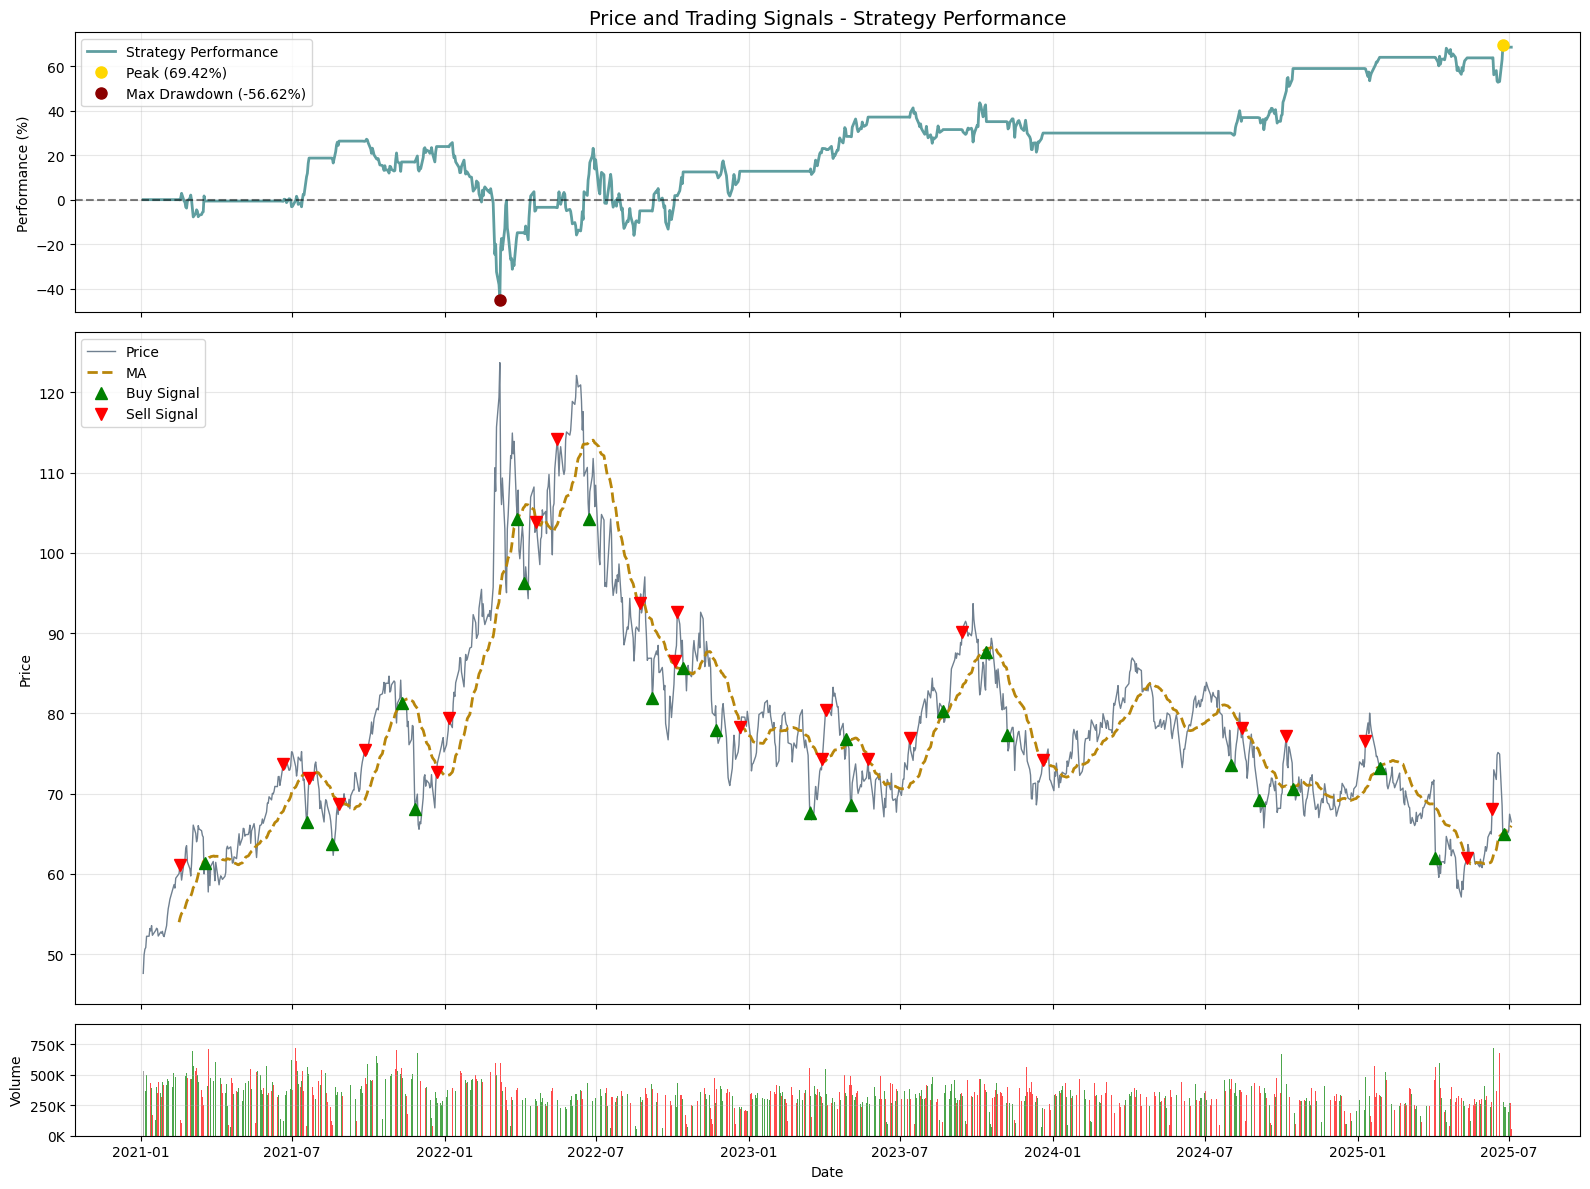

In [65]:
from utils.visualization import plot_price_with_signals_and_volume

plot_price_with_signals_and_volume(df, signals_mr, portfolio_mr)

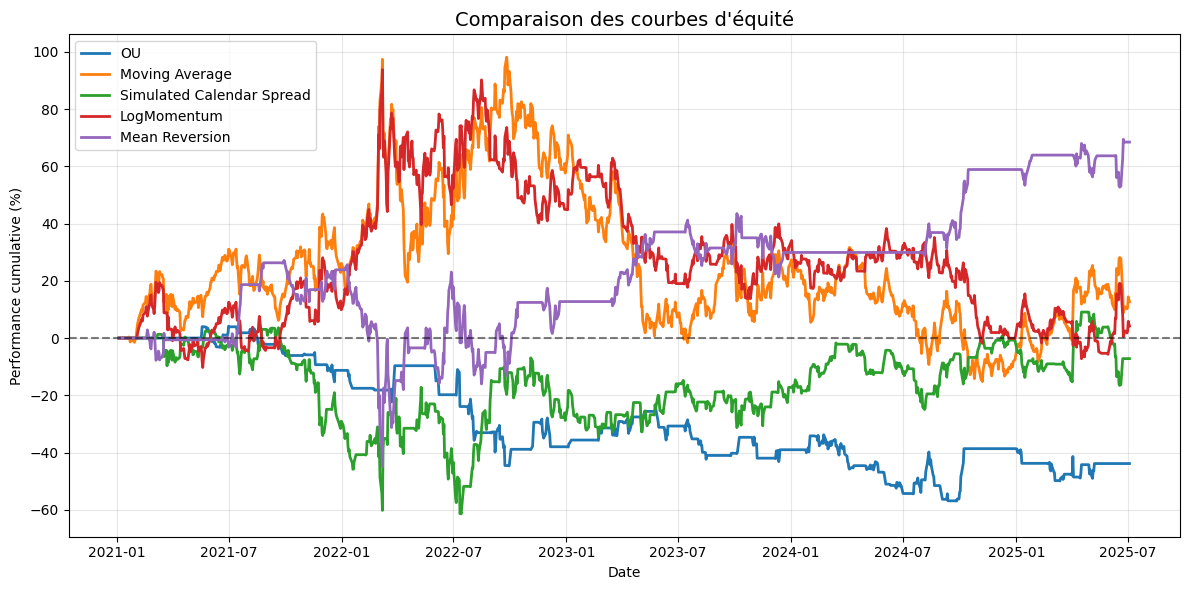

In [66]:
from utils.visualization import plot_multiple_equity_curves

plot_multiple_equity_curves(portfolios, labels=labels)

In [67]:
from backtester.performance import compute_and_print_performance_metrics

metrics = compute_and_print_performance_metrics(portfolios, labels=labels, price_data=df)

                                                                                     RECAP PERFORMANCE                                                                                      
+---------------------------+------------------+-------------------+-----------------------+---------------------------+--------------+------------------+--------------+------------------+
|           Label           | Total Return (%) | Buy & Hold Return | Annualized Return (%) | Annualized Volatility (%) | Sharpe Ratio | Max Drawdown (%) | Win Rate (%) | Number of Trades |
+---------------------------+------------------+-------------------+-----------------------+---------------------------+--------------+------------------+--------------+------------------+
|             OU            |      -43.85      |       39.65       |         -12.05        |           31.54           |    -0.31     |      -58.67      |    13.34     |       118        |
|       Moving Average      |      12.69       |       

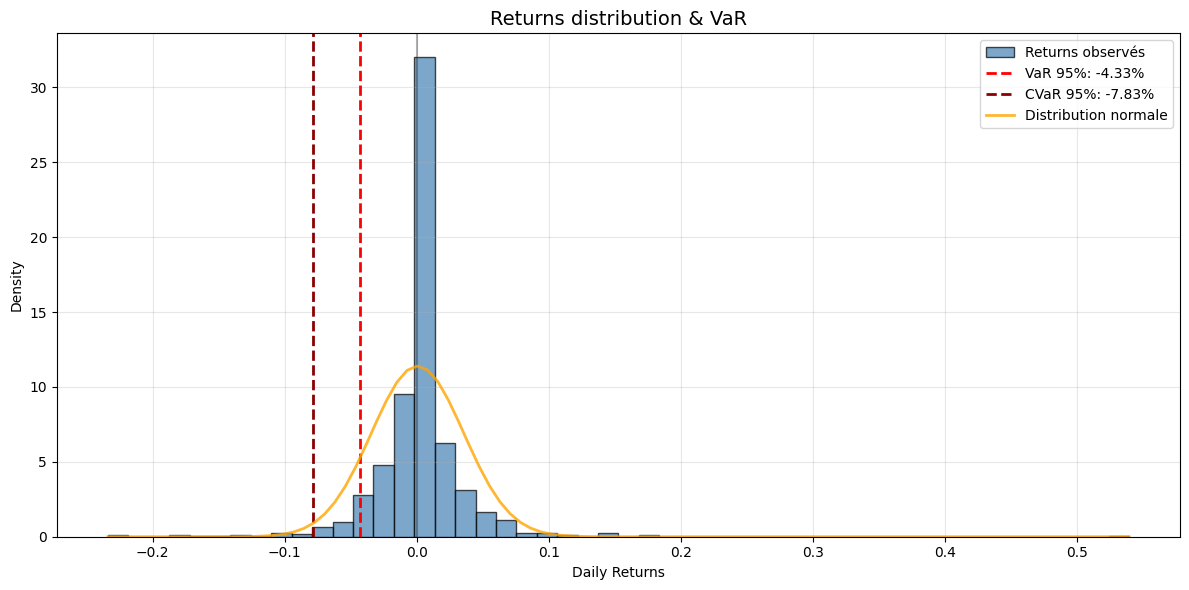

                                               RISK ANALYSIS COMPARISON                                               
+---------------------------+----------+---------+----------+----------+-------------+--------------+----------------+
|           Label           | Mean (%) | Std (%) | Skewness | Kurtosis | VaR 95% (%) | CVaR 95% (%) | CVaR/VaR Ratio |
+---------------------------+----------+---------+----------+----------+-------------+--------------+----------------+
|             OU            |  -0.031  |   1.99  |  0.148   |  13.656  |     -3.0    |    -5.35     |      1.78      |
|       Moving Average      |  0.045   |   2.64  |  0.262   |  2.635   |    -3.84    |    -5.56     |      1.45      |
| Simulated Calendar Spread |  0.052   |   3.5   |  2.691   |  55.94   |    -4.33    |    -7.83     |      1.81      |
|        LogMomentum        |   0.03   |   2.3   |  0.268   |  5.064   |    -3.55    |    -5.13     |      1.45      |
|       Mean Reversion      |  0.077   |   2.53 

In [68]:
from backtester.risk import (plot_risk_analysis ,compare_risk_metrics)
                        

plot_risk_analysis(portfolio_cs)
compare_risk_metrics(portfolios,labels)


In [69]:
signals_mr

,Close,positions,signal,ma,upper_threshold,lower_threshold,exit_on_weakness
Date,,,,,,,
2021-01-04,47.619999,0.0,0.0,NaN,NaN,NaN,False
2021-01-05,49.930000,0.0,0.0,NaN,NaN,NaN,False
2021-01-06,50.630001,0.0,0.0,NaN,NaN,NaN,False
2021-01-07,50.830002,0.0,0.0,NaN,NaN,NaN,False
2021-01-08,52.240002,0.0,0.0,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...
2025-06-30,65.110001,0.0,0.0,65.434000,70.66872,60.199280,False
2025-07-01,65.449997,0.0,0.0,65.532667,70.77528,60.290053,False
2025-07-02,67.449997,0.0,0.0,65.691333,70.94664,60.436026,False
